# Troup Fits
This is going to be my attempt at using the Troup method for finding Mass, Luminocity, and Radius. I did this when I first started the project and I stopped for some reason and I don't remember why?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
%run BinaryDataClean2.py
Tables = BinaryDataClean2('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [3]:
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.cuts(AllVis)
AllAvg = Tables.nvisits_cut(AllAvg,5)
AAS_RG = Tables.rg_cut(AllAvg)

In [4]:
AAS_RG_T = Tables.troup_fits(AAS_RG)
AAS_RG_T = Tables.troup_errors(AAS_RG_T)
AAS_RV_T = Tables.rv_table_add(AAS_RG_T, AllVis)
AllAvg_LMC_T = Tables.mc_cut(AAS_RV_T, 'L')
AllAvg_SMC_T = Tables.mc_cut(AAS_RV_T, 'S')

In [5]:
AAS_RV_T

RADIALV,RADIAL_ERR,RADIAL_DATE,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23],LMCPA,LMCRAD,SMCPA,SMCRAD,MLON,MLAT,M,MERR,DDO51ERR,T2,T2ERR,DELTA_VHELIO,DELTA_PMRA,DELTA_PMDEC,DELTA_FEH,DELTA_ALPHA,TARGET_TYPE,TARGET_NAME,PRIORITY,GAIA_SOURCEID,GAIA_PARALLAX,GAIA_PARALLAX_ERROR,GAIA_DIST05,GAIA_DIST_MODE,GAIA_DIST95,GAIA_PMRA,GAIA_PMRA_ERROR,GAIA_PMDEC,GAIA_PMDEC_ERROR,GAIA_GMAG,GAIA_BPMAG,GAIA_RPMAG,GAIA_PML,GAIA_PMB,GAIA_PMML,GAIA_PMMB,m_bol,M_bol,K0,A_K,BC_K,T_LUM,T_RADIUS,T_MASS,m_bol_ERR,M_bol_ERR,K0_ERR,BC_K_ERR,T_LUM_ERR,T_RADIUS_ERR,T_MASS_ERR
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,solLum,solRad,solMass,,,,,solLum,solRad,solMass
str111,str111,str141,str47,str36,str59,str38,str18,str8,int32,str5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,str192,str35,int32,int32,int32,int16,float32,int32,str165,int32,str58,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str4,str7,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,int32,str189,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,in

First I want to make sure I have good 'K' magnitude values. As well as K-band (bad values are stored as 99) extinction terms using AK_TARG, or AK_WISE if they're avalible. If not then just use zero and call it good.

Text(0.5, 0, 'Bolometric Correction')

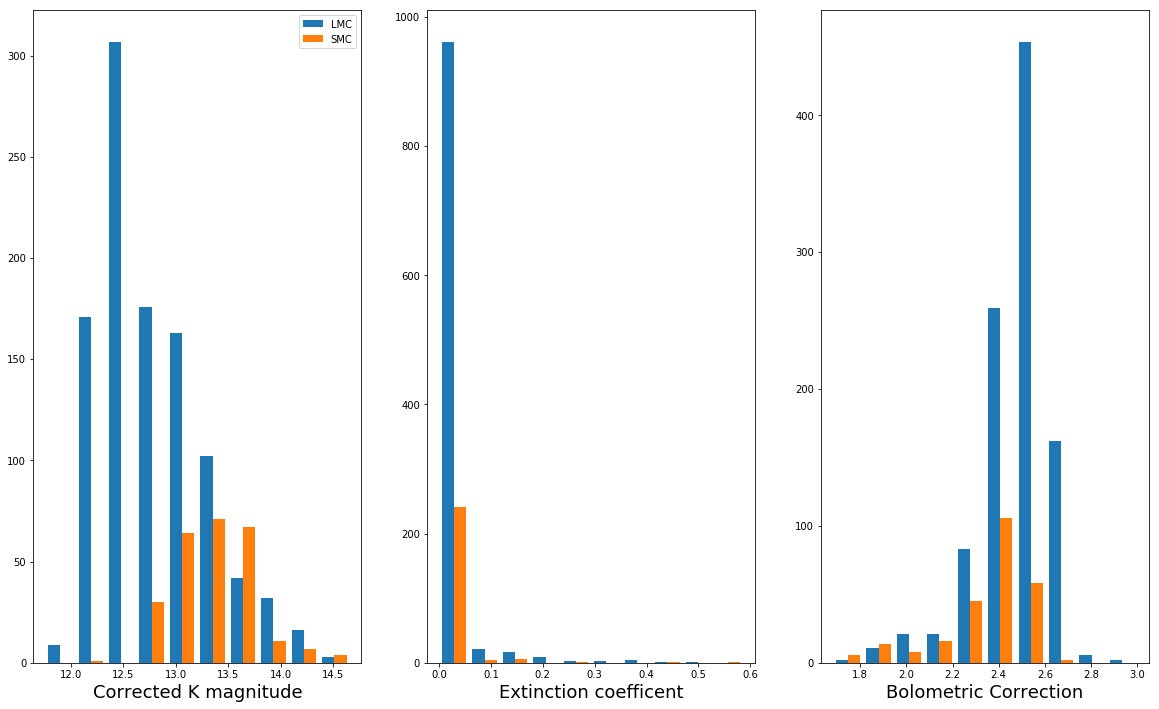

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,12))

ax1.hist([AllAvg_LMC_T['K0'], AllAvg_SMC_T['K0']], label = ['LMC', 'SMC'])
ax1.set_xlabel('Corrected K magnitude', size = 18)
ax1.legend()

ax2.hist([AllAvg_LMC_T['A_K'], AllAvg_SMC_T['A_K']])
ax2.set_xlabel('Extinction coefficent', size = 18)

ax3.hist([AllAvg_LMC_T['BC_K'], AllAvg_SMC_T['BC_K']])
ax3.set_xlabel('Bolometric Correction', size = 18)


Text(0.5, 0, 'Radius')

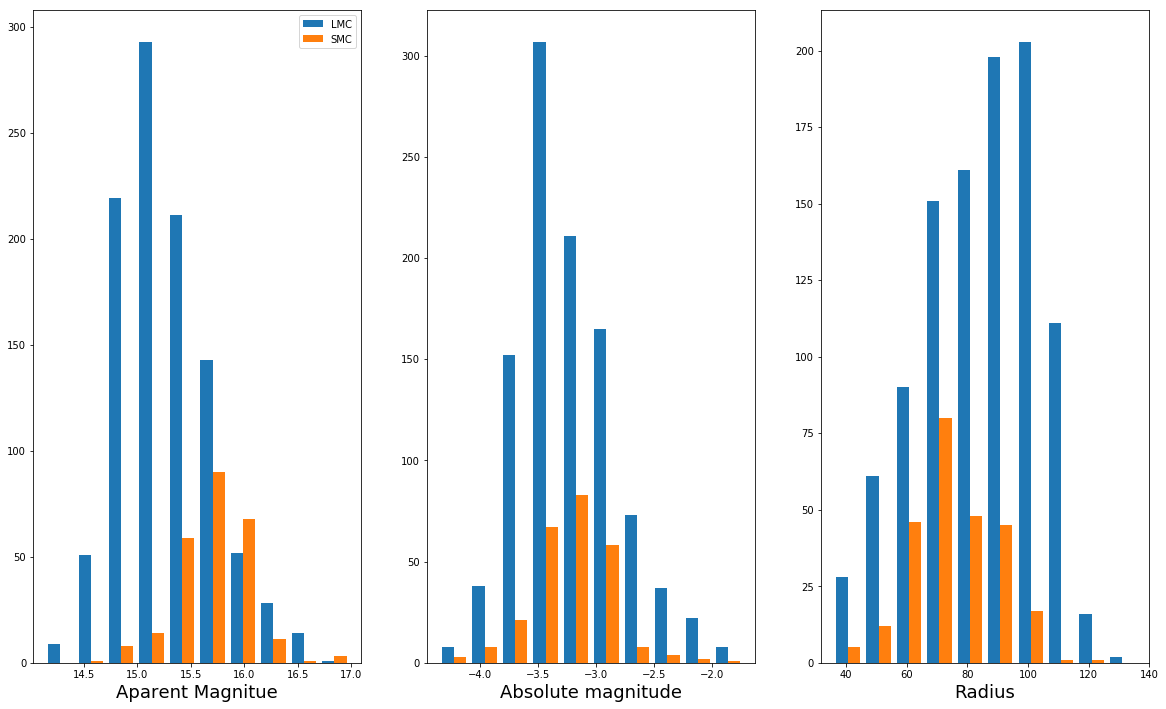

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,12))

ax1.hist([AllAvg_LMC_T['m_bol'], AllAvg_SMC_T['m_bol']], label = ['LMC', 'SMC'])
ax1.set_xlabel('Aparent Magnitue', size = 18)
ax1.legend()

ax2.hist([AllAvg_LMC_T['M_bol'], AllAvg_SMC_T['M_bol']])
ax2.set_xlabel('Absolute magnitude', size = 18)

ax3.hist([AllAvg_LMC_T['T_RADIUS'], AllAvg_SMC_T['T_RADIUS']])
ax3.set_xlabel('Radius', size = 18)


Text(0.5, 0, 'LOGG')

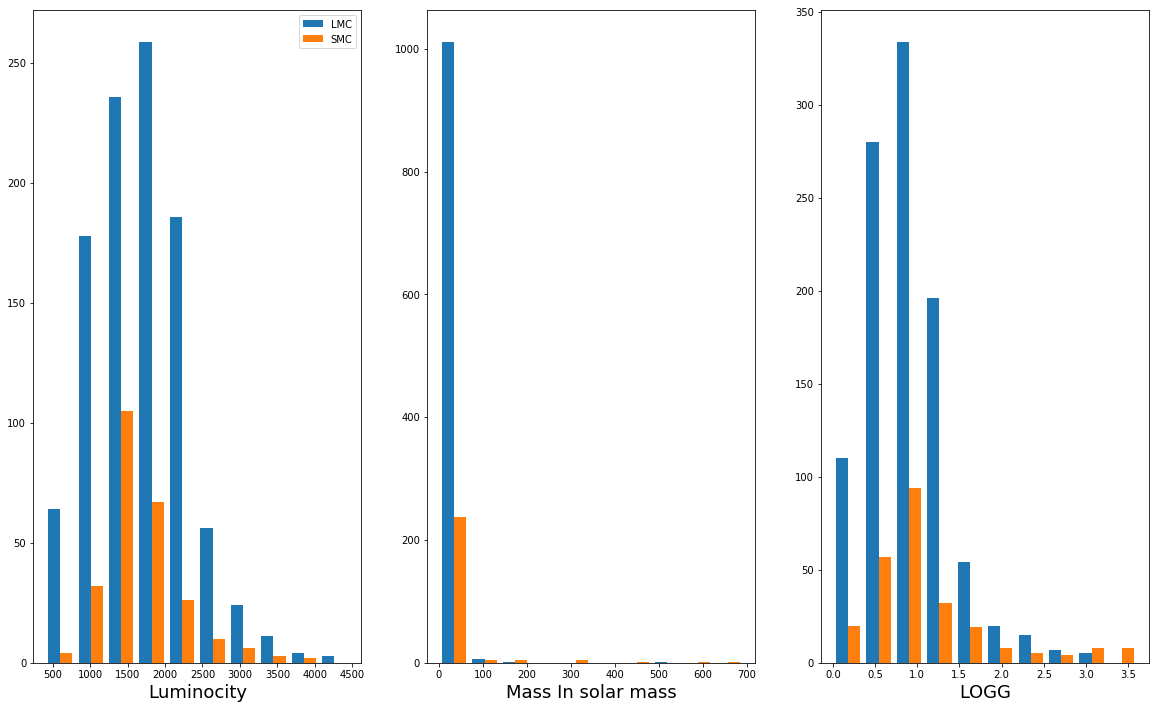

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,12))

ax1.hist([AllAvg_LMC_T['T_LUM'], AllAvg_SMC_T['T_LUM']], label = ['LMC', 'SMC'])
ax1.set_xlabel('Luminocity', size = 18)
ax1.legend()

ax2.hist([AllAvg_LMC_T['T_MASS'], AllAvg_SMC_T['T_MASS']])
ax2.set_xlabel('Mass In solar mass', size = 18)

ax3.hist([AllAvg_LMC_T['LOGG'], AllAvg_SMC_T['LOGG']])
ax3.set_xlabel('LOGG', size = 18)

### I want to compaire these to the Isochrone fits I had been doing. 

In [9]:
AAS_RG_IT = Tables.iso_fit(AAS_RG_T,ISO)
AAS_RV_IT = Tables.rv_table_add(AAS_RG_IT, AllVis)
AllAvg_LMC_IT = Tables.mc_cut(AAS_RV_IT, 'L')
AllAvg_SMC_IT = Tables.mc_cut(AAS_RV_IT, 'S')

Text(0.5, 0.95, 'Troup Fits vs. Isochrone Fits')

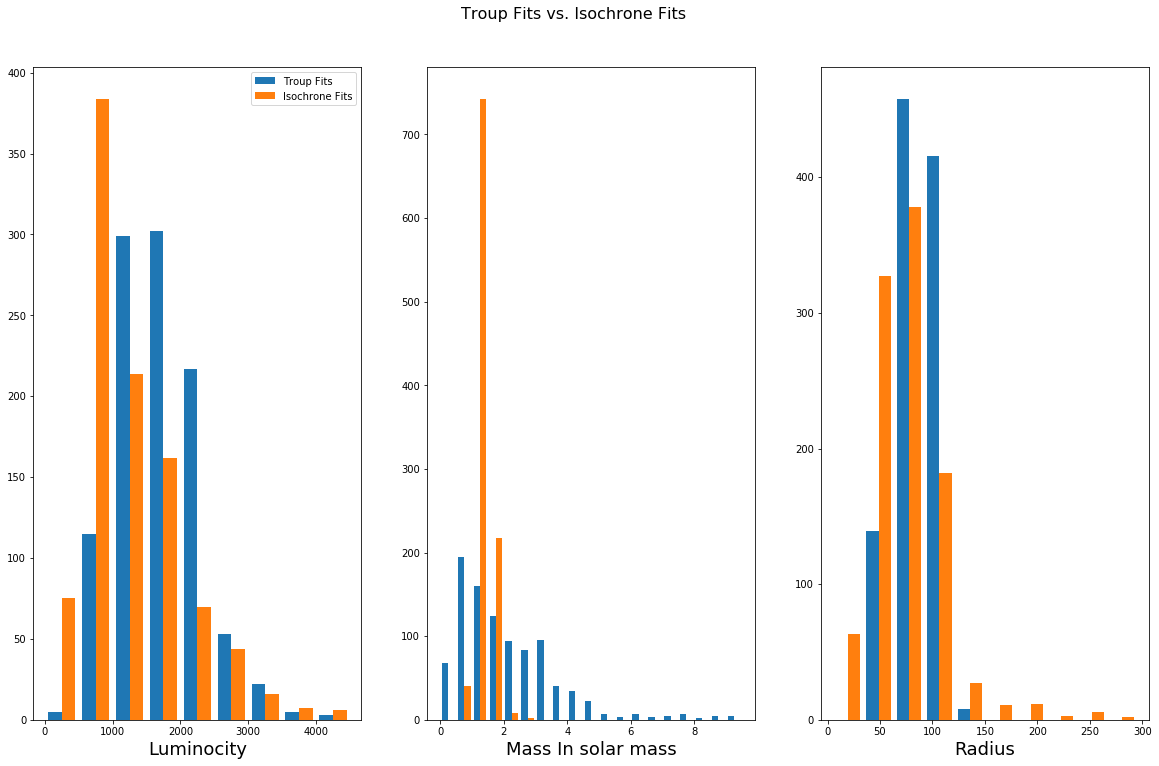

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,12))

ax1.hist([AllAvg_LMC_T['T_LUM'], AllAvg_LMC_IT['ISO_MEANL']], label = ['Troup Fits', 'Isochrone Fits'],
         bins = np.arange(0,5000,500))
ax1.set_xlabel('Luminocity', size = 18)
ax1.legend()

ax2.hist([AllAvg_LMC_T['T_MASS'], AllAvg_LMC_IT['ISO_MEANM']], bins = np.arange(0,10, 0.5))
ax2.set_xlabel('Mass In solar mass', size = 18)

ax3.hist([AllAvg_LMC_T['T_RADIUS'], AllAvg_LMC_IT['ISO_MEANR']])
ax3.set_xlabel('Radius', size = 18)
plt.suptitle('Troup Fits vs. Isochrone Fits', size = 16,y=0.95)

 ##### Now I want to take the Troup first and do the normal Binary Fraction that I've been doing just to see what I get

In [ ]:
%run Table_Convert.py
AllAvg_SMC=Table_Convert(AllAvg_SMC_T)
AllAvg_LMC=Table_Convert(AllAvg_LMC_T)

In [ ]:
AllAvg_LMC = Tables.nvisits_cut(AllAvg_LMC,5)
AllAvg_SMC = Tables.nvisits_cut(AllAvg_SMC,5)

In [ ]:
%run Binary_Fraction.py
thing_LMC = Binary_Fraction(AllAvg_LMC)
thing_SMC = Binary_Fraction(AllAvg_SMC)

In [ ]:
#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC = thing_LMC.Real_Data_Fraction()
real_data_SMC = thing_SMC.Real_Data_Fraction()

#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(500,'L',True,False,[0,1],30)
synthetic_rates_SMC = thing_SMC.synthetic_detection_rate(500,'L',True,False,[0,1],30)

In [ ]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC[3][0][1], synthetic_rates_LMC[3][1][1]],
                 [synthetic_rates_LMC[3][0][0], synthetic_rates_LMC[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC[3][0][0], real_data_LMC[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC[3][0][1], synthetic_rates_SMC[3][1][1]],
                 [synthetic_rates_SMC[3][0][0], synthetic_rates_SMC[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC[3][0][0], real_data_SMC[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')

#plt.text(0.91, 0.72, '{:2f}'.format(synthetic_rates_LMC[2][-1]))
#plt.text(0.91, 0.55, '{:2f}'.format(synthetic_rates_SMC[2][-1]))

plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.yticks(np.arange(0,1.05,.05))

plt.title('Binary Detection Rate', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

In [12]:
from thejoker.data import RVData
from thejoker.plot import plot_rv_curves
from thejoker.sampler import compute_likelihoods
from thejoker.sampler import JokerParams

import astropy.units as  u
import matplotlib.pyplot as plt
import numpy as np
import schwimmbad

In [16]:
%run Table_Convert.py
AAS_RV_IT=Table_Convert(AAS_RV_IT)

In [ ]:
"""
for N in range(len(AAS_RV_T)):
    t = AAS_RV_T['RADIAL_DATE'][N]
    rv_dat = AAS_RV_T['RADIALV'][N]*u.km/u.s
    err = AAS_RV_T['RADIAL_ERR'][N]*u.km/u.s
    data = RVData(t = t, rv=rv_dat, stddev = err)
    ax = data.plot()
    ax.set_xlabel("Time [JD]")
    ax.set_ylabel("RV [km/s]")
    ax.hlines(np.mean(rv_dat.value), t[0] ,t[-1], linestyles='dashed')
    #ax.set_ylim(np.mean(rv_dat.value)-3, np.mean(rv_dat.value)+3)
    ax.set_title((AAS_RV_T['APOGEE_ID'][N]))
    plt.show()
    plt.close()
"""

77


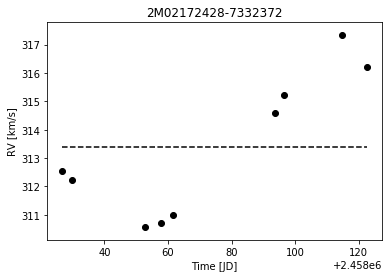

In [63]:
# Pick one star to look at for now.
Star = '2M05202496-7318323'
for N in range(len(AAS_RV_IT)):
    if AAS_RV_IT['APOGEE_ID'][N] == Star:
        M = N
        print(N)

t = AAS_RV_IT['RADIAL_DATE'][M]
rv_dat = AAS_RV_IT['RADIALV'][M]*u.km/u.s
err = AAS_RV_IT['RADIAL_ERR'][M]*u.km/u.s
data = RVData(t = t, rv=rv_dat, stddev = err)
ax = data.plot()
ax.set_xlabel("Time [JD]")
ax.set_ylabel("RV [km/s]")
ax.hlines(np.mean(rv_dat.value), t[0] ,t[-1], linestyles='dashed')
#ax.set_ylim(np.mean(rv_dat.value)-3, np.mean(rv_dat.value)+3)
ax.set_title((AAS_RV_IT['APOGEE_ID'][N]))
plt.show()
plt.close()

In [64]:
AAS_RV_T['T_MASS','T_LUM','T_RADIUS',"ISO_MEANM","ISO_MEANL","ISO_MEANR","LOGG","TEFF","FE_H"][M]

T_MASS,T_LUM,T_RADIUS,ISO_MEANM,ISO_MEANL,ISO_MEANR,LOGG,TEFF,FE_H
solMass,solLum,solRad,solMass,solLum,solRad,,,
float64,float64,float64,float64,float64,float64,float32,float32,float32
0.5671489580216823,3013.2939373763816,124.28191580979136,2.232041120529175,12595.013671875,254.0893791257501,0.00294891,3836.04,-1.3863484


In [58]:
AAS_RV_T['LOGG'][M] < 3.7 + 0.1*AAS_RV_T['FE_H'][M]
0.1*AAS_RV_T['FE_H'][M]

-0.05533835291862488

In [59]:
10**AAS_RV_T["LOGG"][M]

7.460307344312754

In [60]:
from thejoker.sampler import JokerParams
params = JokerParams(P_min=8*u.day, P_max=512*u.day)

In [61]:
from thejoker.sampler import TheJoker
joker = TheJoker(params)
samples = joker.rejection_sample(data, n_prior_samples=65536)

INFO: 68 good samples after rejection sampling [thejoker.sampler.sampler]


INFO: 1 good sample after rejection sampling [thejoker.sampler.sampler]
1
[113.44988263] d [0.15759717] [3.23740582] km / s


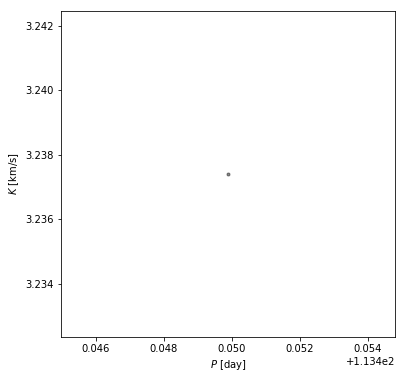

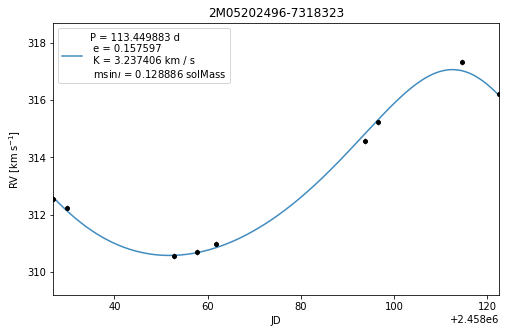

In [87]:
from thejoker.data import RVData
from thejoker.sampler import JokerParams, TheJoker
from thejoker.plot import plot_rv_curves
import astropy.units as u
import schwimmbad

t = AAS_RV_T['RADIAL_DATE'][M]
rv = AAS_RV_T['RADIALV'][M]*u.km/u.s
err = AAS_RV_T['RADIAL_ERR'][M]*u.km/u.s

data = RVData(t=t, rv=rv, stddev=err)
params = JokerParams(P_min=8*u.day, P_max=700*u.day)
#pool = schwimmbad.MultiPool()
joker = TheJoker(params)

samples = joker.rejection_sample(data, n_prior_samples=2**16)

fig, ax = plt.subplots(1, 1, figsize=(6,6)) # doctest: +SKIP
ax.scatter(samples['P'].value, samples['K'].to(u.km/u.s).value,
           marker='.', color='k', alpha=0.45) # doctest: +SKIP
ax.set_xlabel("$P$ [day]")
ax.set_ylabel("$K$ [km/s]")

# Davids IDL code for finding msini,
k = (samples['K'][0]*1000).value
P = (samples['P'][0].value)*24*3600
e = samples['e'][0].value
a1sini = k*P * np.sqrt(1-e**2) / (2*np.pi)
mass_fn = 4*np.pi**2 *a1sini**3 / (G*P**2)
mass_fn = mass_fn/msun # Put mass fraction in units of solar mass
mstar = ((AAS_RV_T['ISO_MEANM'][77]*u.solMass)).value
msini = 1
dmsini = 1
print(dmsini)
while dmsini > 0.0001:
    msini_orig = msini
    m = msini
    msini = (mass_fn * (mstar+m)**2)**(1/3)
    dmsini = abs(msini-msini_orig)
    

fig, ax = plt.subplots(1, 1, figsize=(8,5)) # doctest: +SKIP
t_grid = np.linspace(t[0], t[-1], 1024)
plot_rv_curves(samples, t_grid, rv_unit=u.km/u.s, data=data, ax=ax,
               plot_kwargs=dict(color='C0',
                                label = 'P = {:0f}\n e = {:0f}\n K = {:0f}\n m$\sin\i$ = {:1f}'.format(samples['P'][0], samples['e'][0],
                                                                                          samples['K'][0], msini*u.solMass)),
               n_plot = 1)
print(samples['P'], samples['e'], samples['K'],)
Table(AAS_RV_T[:][M])
plt.title(Star)
ax.set_xlabel('JD')
ax.legend()

In [33]:
from sympy.solvers import solve
from sympy import Symbol
import astropy.units as u
def min_mass(samples,N):
    P = (samples['P'].to(u.s)).value
    e = samples['e'].value
    K = samples['K'].to(u.m/u.s).value
    g = G.value
    m2 = Symbol('m2', positive = True)
    M = AAS_RV_T['T_MASS'][N]
    n = 2*np.pi/P
    a =  ((g*(M + m2))/(4*np.pi**2) * P**2)**(1/3)
    k = (m2 / (M + m2))*n*a*np.sin(np.pi/2) / (np.sqrt(1-e**2))
    solve(k, m2)
    

In [67]:
P = (samples['P'].to(u.s)).value
e = samples['e'].value
K = samples['K'].to(u.m/u.s).value
g = G
m2 = Symbol('m2', positive = True)
Mass = ((AAS_RV_T['T_MASS'][77]*u.solMass).to(u.kg)).value
n = 2*np.pi/P
a =  ((g*(Mass + m2))/(4*np.pi**2) * P**2)**(1/3)
k = (m2 / (Mass + m2))*n*a*np.sin(np.pi/2) / (np.sqrt(1-e**2))
m_min = solve(k - K, m2)
x = m_min[0]
print(x)

1.06280975381869e+29


In [37]:
(AAS_RV_T['T_MASS'][77]*u.solMass).to(u.kg)

<Quantity 1.12776176e+30 kg>

### Davids IDL code, 
(WTF is wrong with idl?) 

    ; Calculate msini and a2sini
    ; Input: params: p -period in days
    ;                k - semimajoramplitude in m/s
    ;                e - eccentricity
    ;        perror: Parameter Errors as above
    ;        mstar - mass of the primary in solar masses
    ; par = [p, tp, e,om,k,gamma, dvdt]

    if n_elements(mstar) eq 0 then mstar=1.0

    ;ANCILLARY QUANTITIES
    ;See Bowers and Deeming, pg. 317,318
    G = 6.67259d-11
    AU = 1.4960d11
    msun = 1.98892e30
    psec = p*24.*3600.

    a1sini = k*psec*sqrt(1.-e^2)/(2.*!pi)   ;in meters
    massfn = 4.*!pi^2*a1sini^3/(G*psec^2)   ;in kg
    massfn /= msun ;in Msun
    ;massfn = (m2*sini)^3/(m1+m2)^2

    ;Determine Secondary mass iteratively
    msini = 0. 
    ;msini = 1.
    REPEAT BEGIN
          msini_orig = msini
          m = msini
          msini = (massfn * (mstar+m)^2)^(1./3.)
          dmsini = abs(msini-msini_orig)
          ;print, msini
    ENDREP UNTIL MEAN(dmsini) LT 0.0001
    ;print, msini
    ;msini_jup = msini * msun/ 1.8991d27  ;in Jupiter masses
    ; m1/m2 = a2/a1 -> a2=a1sini*m1/m2sini
    a1sini /= AU
    a2 = a1sini * (mstar/msini)

In [68]:
G = 6.67259e-11
AU = 1.4960e11
msun = 1.98892e30

In [70]:
k = (samples['K']*1000).value
P = (samples['P'].value)*24*3600
e = samples['e'].value
a1sini = k*P * np.sqrt(1-e**2) / (2*np.pi)
mass_fn = 4*np.pi**2 *a1sini**3 / (G*P**2)
mass_fn = mass_fn/msun # Put mass fraction in units of solar mass
mstar = ((AAS_RV_T['T_MASS'][77]*u.solMass)).value
msini = 1
dmsini = 1
print(dmsini)
while dmsini > 0.0001:
    msini_orig = msini
    m = msini
    msini = (mass_fn * (mstar+m)**2)**(1/3)
    dmsini = abs(msini-msini_orig)
    print(dmsini, msini)

1
[0.90089327] [0.09910673]
[0.04307205] [0.05603468]
[0.00244182] [0.05359287]
[0.00014009] [0.05345278]
[8.04231156e-06] [0.05344474]


In [ ]:
mass_fn = 4*np.pi**2 *a1sini**3 / (G*P**2)
mass_fn 
mass_fn

In [ ]:
a1sini = k*P*24*3600 * np.sqrt(1-e**2) / (2*np.pi)
(a1sini*u.m).to(u.AU)

In [ ]:
1000*u.solRad.to(u.AU)

In [ ]:
P